# 대전 코로나 19 발병 현황에 대한 EDA    

1. 일자별, 연령별, 성별, 거주지별 구분
2. 확진일자와 완치일자 비교를 통한 평균 완치 소요일 추정
3. 접촉 유형 분류


In [2]:
import webbrowser
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    #한글 폰트 깨짐 방지

In [80]:
#출력 결과 여러개 보는 거 추가 고려

In [4]:
from collections import Counter

In [81]:
url='https://www.daejeon.go.kr/corona19/index.do?menuId=0002'

In [82]:
html_coros=requests.get(url).text
soup_coros=BeautifulSoup(html_coros, 'lxml')

In [83]:
html_coros

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="keywords" content="대전광역시 코로나19" />\r\n<meta name="description" content="대전광역시, 코로나19">\r\n\r\n<script type="text/javascript" src="/corona19/js/drh/layout/jquery-1.11.3.min.js"></script>\r\n<script type="text/javascript" src=\'/corona19/js/cmm/commonUtil.js\'></script>\r\n<script type="text/javascript" src=\'/corona19/js/cmm/stringUtil.js\'></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/system_util.js" ></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/system_board.js"></script>\r\n\r\n<script type="text/javascript" src="/corona19/js/drh/layout/jquery.bxslider.min.js"></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/jquery.form.min.js"></script>\r\n<script type="text/javascript" src

In [84]:
soup_coros

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대전광역시 코로나19" name="keywords"/>
<meta content="대전광역시, 코로나19" name="description"/>
<script src="/corona19/js/drh/layout/jquery-1.11.3.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/commonUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/stringUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_util.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_board.js" type="text/javascript"></script>
<script src="/corona19/js/drh/layout/jquery.bxslider.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/jquery.form.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/html5shiv.js" type="text/javascript"></script>
<script src="/corona19/js/drh/common.js" type="text/ja

In [85]:
coros=soup_coros.select('td ')

In [86]:
coros[0:10]

[<td rowspan="1" style="width: 98px; height: 18px;">
 <p>103<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>미채번<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>6.26<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>남(50대)<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>서구<br/></p></td>,
 <td rowspan="1" style="width: 242px; height: 18px;">
 <p>대전 100번 확진자의 접촉자<br/></p></td>,
 <td rowspan="1" style="width: 285px; height: 18px;">
 <p>충남대병원 입원(6.26)<br/></p></td>,
 <td rowspan="1" style="width: 98px; height: 18px;">
 <p>102<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>12587<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>6.25<br/></p></td>]

In [87]:
coros[1].get_text()

'\n미채번'

In [88]:
coros_address=[coros_element.get_text() for coros_element in coros [0:] ]

In [89]:
coros_address

['\n103',
 '\n미채번',
 '\n6.26',
 '\n남(50대)',
 '\n서구',
 '\n대전 100번 확진자의 접촉자',
 '\n충남대병원 입원(6.26)',
 '\n102',
 '\n12587',
 '\n6.25',
 '\n남(20대)',
 '\n서구',
 '\n역학조사중',
 '\n청주의료원 입원(6.25)',
 '\n101',
 '\n12576',
 '\n6.25',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n100',
 '\n12579',
 '\n6.24',
 '\n여(50대)',
 '\n중구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n99',
 '\n12572',
 '\n6.24',
 '\n여(80대)',
 '\n서구',
 '\n열매노인요양원',
 '\n충남대병원 입원(6.25)',
 '\n98',
 '\n12560',
 '\n6.24',
 '\n남(50대)',
 '\n유성구',
 '\n대전60번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n97',
 '\n12559',
 '\n6.24',
 '\n여(50대)',
 '\n유성구',
 '\n대전92번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n96',
 '\n12541',
 '\n6.24',
 '\n여(60대)',
 '\n서구',
 '\n대한토지법인 콜센터',
 '\n충남대병원 입원(6.24)',
 '\n95',
 '\n12540',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.24)',
 '\n94',
 '\n12531',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 가족',
 '\n충남대병원 입원(6.24)',
 '\n93',
 '\n12532',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 

In [90]:
n=7
result=[coros_address[i *n:(i+1)*n]for i in range((len(coros_address)+n-1)//n)]

print(result)

[['\n103', '\n미채번', '\n6.26', '\n남(50대)', '\n서구', '\n대전 100번 확진자의 접촉자', '\n충남대병원 입원(6.26)'], ['\n102', '\n12587', '\n6.25', '\n남(20대)', '\n서구', '\n역학조사중', '\n청주의료원 입원(6.25)'], ['\n101', '\n12576', '\n6.25', '\n여(50대)', '\n서구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n100', '\n12579', '\n6.24', '\n여(50대)', '\n중구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n99', '\n12572', '\n6.24', '\n여(80대)', '\n서구', '\n열매노인요양원', '\n충남대병원 입원(6.25)'], ['\n98', '\n12560', '\n6.24', '\n남(50대)', '\n유성구', '\n대전60번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n97', '\n12559', '\n6.24', '\n여(50대)', '\n유성구', '\n대전92번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n96', '\n12541', '\n6.24', '\n여(60대)', '\n서구', '\n대한토지법인 콜센터', '\n충남대병원 입원(6.24)'], ['\n95', '\n12540', '\n6.24', '\n여(50대)', '\n서구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.24)'], ['\n94', '\n12531', '\n6.24', '\n여(50대)', '\n서구', '\n대전86번 확진자의 가족', '\n충남대병원 입원(6.24)'], ['\n93', '\n12532', '\n6.24', '\n여(50대)', '\n서구', '\n오렌지타운', '\n충남대병원 입원(6.24)'], ['\n92', '\n12533', '\

In [91]:
coros_chart_d={'대전 확진자': result}
df=pd.DataFrame(result, columns=['대전','질본','확진일자','성별(연령대)','거주지','접촉력','조치사항'],
               index=range(1,len(result)+1))
df

,대전,질본,확진일자,성별(연령대),거주지,접촉력,조치사항
1,\n103,\n미채번,\n6.26,\n남(50대),\n서구,\n대전 100번 확진자의 접촉자,\n충남대병원 입원(6.26)
2,\n102,\n12587,\n6.25,\n남(20대),\n서구,\n역학조사중,\n청주의료원 입원(6.25)
3,\n101,\n12576,\n6.25,\n여(50대),\n서구,\n대전86번 확진자의 접촉자,\n충남대병원 입원(6.25)
4,\n100,\n12579,\n6.24,\n여(50대),\n중구,\n대전86번 확진자의 접촉자,\n충남대병원 입원(6.25)
5,\n99,\n12572,\n6.24,\n여(80대),\n서구,\n열매노인요양원,\n충남대병원 입원(6.25)
...,...,...,...,...,...,...,...
99,5,1252,2.26,남(30대),유성,,완치(3.9)
100,4,1256,2.26,여(40대),유성,,완치(3.2)
101,3,573,2.23,남(60대),유성,대전 2번 접촉자,완치(5.5)
102,2,372,2.22,여(60대),유성,,완치(3.28)


In [92]:
df[ '대전' ] = df[ '대전' ].str.replace( '\\n', '' )
df[ '질본' ] = df[ '질본' ].str.replace( '\\n', '' )
df[ '확진일자' ] = df[ '확진일자' ].str.replace( '\\n', '' )
df[ '성별(연령대)' ] = df[ '성별(연령대)' ].str.replace( '\\n', '' )
df[ '거주지' ] = df[ '거주지' ].str.replace( '\\n', '' )
df[ '접촉력' ] = df[ '접촉력' ].str.replace( '\\n', '' )
df[ '조치사항' ] = df[ '조치사항' ].str.replace( '\\n', '' )
df

,대전,질본,확진일자,성별(연령대),거주지,접촉력,조치사항
1,103,미채번,6.26,남(50대),서구,대전 100번 확진자의 접촉자,충남대병원 입원(6.26)
2,102,12587,6.25,남(20대),서구,역학조사중,청주의료원 입원(6.25)
3,101,12576,6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
4,100,12579,6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
5,99,12572,6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25)
...,...,...,...,...,...,...,...
99,5,1252,2.26,남(30대),유성,,완치(3.9)
100,4,1256,2.26,여(40대),유성,,완치(3.2)
101,3,573,2.23,남(60대),유성,대전 2번 접촉자,완치(5.5)
102,2,372,2.22,여(60대),유성,,완치(3.28)


In [93]:
#데이터 프레임 만들고 해결하는 거라면 아래 식으로 해결. \의 경우 \\여야만 인식한다고 함

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 1 to 103
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   대전       103 non-null    object
 1   질본       103 non-null    object
 2   확진일자     103 non-null    object
 3   성별(연령대)  103 non-null    object
 4   거주지      103 non-null    object
 5   접촉력      103 non-null    object
 6   조치사항     103 non-null    object
dtypes: object(7)
memory usage: 5.8+ KB


# 각 항목 설명   
대전은 대전 지역에서 감염이 확인된 확진자들의 넘버링이다.   
질본은 전국 데이터에서 등록된 대전지역 확진자들의 넘버링을 뜻한다.   
확진일자는 감염 의심자의 감염이 최종적으로 확진된 일자를 말한다.   
성별(연령대)는 해당 확진자의 인적 정보를 뜻한다.   
거주지는 해당 확진자의 거주 지역을 뜻한다.   
접촉력은 해당 확진자의 감염 경로를 뜻한다.   
조치사항은 해당 확진자의 완치 여부 및 수용 현황을 뜻한다.   

# 일자별 확진자 발생 추이

In [95]:
df['확진일자'].unique()

array(['6.26', '6.25', '6.24', '6.23', '6.22', '6.20', '6.19', '6.18',
       '6.17', '6.16', '6.15', '5.30', '5.22', '5.16', '5.11', '5.6',
       '4.21', '4.5', '4.4', '3.30', '3.28', '3.26', '3.25', '3.24',
       '3.21', '3.12', '3.11', '3.4', '3.3', '3.1', '2.28', '2.27',
       '2.26', '2.23', '2.22', '2.21'], dtype=object)

In [96]:
df['확진일자'].value_counts()
a=df['확진일자'].value_counts().sort_index()

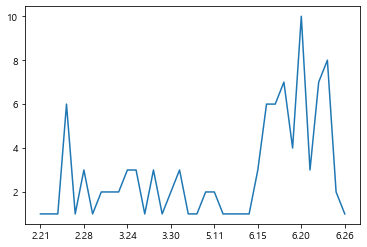

In [97]:
a.plot()

최초 발생은 2월 21일부터 발생하였으며, 6월 15일을 기점으로 급격히 상승하여 기세를 유지하고 있다. 

# 확진자별 거주지역 통계

In [98]:
df['거주지'].value_counts()
b=df['거주지'].value_counts()
b_df=pd.DataFrame(b)
b_df

,거주지
서구,40
유성구,35
중구,10
유성,5
동구,4
대덕구,3
세종시,2
서울 (동구에 포함),1
대덕,1
수원,1


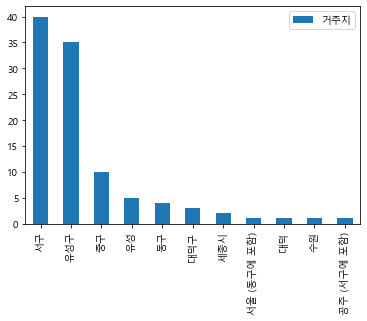

In [99]:
b_df.plot(kind='bar')

확진자들의 주요 거주지로는 서구와 유성구가 상위인 것으로 나타났다. 

In [100]:
#유성과 유성구, 대덕과 대덕구가 같은데 이를 합하여 처리하지 못했다. 

# 성별, 연령별 확진자 비교

In [101]:
sex=df['성별(연령대)'].value_counts()
sex

여(50대)         18
여(60대)         17
남(50대)         11
여(20대)         10
남(60대)         10
남(20대)          7
남(30대)          6
여(40대)          6
여(70대)          5
남(70대)          3
남(10대)          3
남(80대)          2
남(40대)          1
여(80대)          1
남(20대, 외국인)     1
여(10대)          1
여(90대)          1
Name: 성별(연령대), dtype: int64

In [102]:
sex.head(5)

여(50대)    18
여(60대)    17
남(50대)    11
여(20대)    10
남(60대)    10
Name: 성별(연령대), dtype: int64

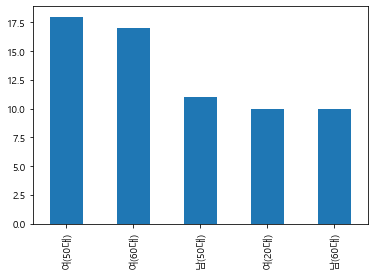

In [103]:
sex.head(5).plot(kind='bar')

누적 확진자로 볼때, 누적 확진자는 주로 50~60대 이상 여성인 것으로 확인되었다.

# 접촉유형 비교

In [104]:
df['접촉력'].value_counts().head(5)

              15
해외입국자         14
둔산전자타운        13
오렌지타운(사무실)     6
꿈꾸는 교회         3
Name: 접촉력, dtype: int64

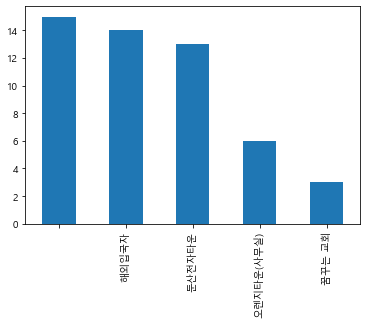

In [105]:
place=df['접촉력'].value_counts().head(5)
place.plot(kind='bar')

감염 경로 상위 5개 항목. 경로 불명(15명)을 제외하면 해외 입국자(14명)와 다중 이용시설(둔산 전자타운, 13명)에서 주로 확진자가 발생했음을 알 수 있다.

# 6월 15일 이후 확진자 추이

In [106]:
new=df['확진일자'].head(55)
new_df=pd.DataFrame(new)

In [107]:
new_df['확진일자'].value_counts()

6.20    10
6.24     8
6.23     7
6.18     7
6.16     6
6.17     6
6.19     4
6.22     3
6.25     2
6.15     1
6.26     1
Name: 확진일자, dtype: int64

In [108]:
new_df['확진일자'].value_counts().sort_index()

6.15     1
6.16     6
6.17     6
6.18     7
6.19     4
6.20    10
6.22     3
6.23     7
6.24     8
6.25     2
6.26     1
Name: 확진일자, dtype: int64

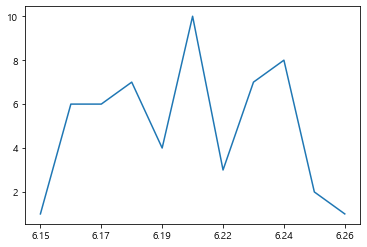

In [109]:
new2=new_df['확진일자'].value_counts().sort_index()
new2.plot()

In [110]:
# 선그래프에 주석 넣는 거 잊지 말자.

In [59]:
settle=df['거주지'].head(55)
settle_df=pd.DataFrame(settle)

In [60]:
settle_df['거주지'].value_counts()

서구     23
유성구    16
중구      9
동구      3
세종시     2
수원      1
대덕구     1
Name: 거주지, dtype: int64

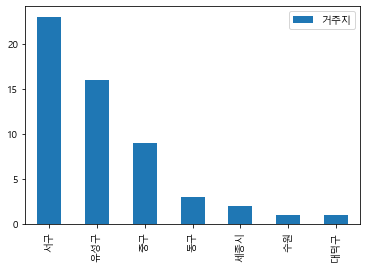

In [64]:
settle2=pd.DataFrame(settle_df['거주지'].value_counts())
settle2.plot(kind='bar')

In [67]:
df['접촉력'].head(55)
contact=df['접촉력'].head(55)

In [68]:
contact_df=pd.DataFrame(contact)

In [ ]:
#15일 이후 중구 쪽 인원이 늘어난 것을 언급하고 싶으면 15일 이전 그래프도 함께 같이 넣어서 비교할 수 있도록 할 것.

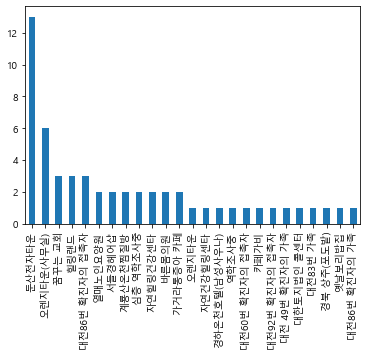

In [71]:
contact_df['접촉력'].value_counts().plot(kind='bar')

6월 15일 이후 발생한 55명의 확진자들은 20~24일(25명)에 발생이 집중되었으며, 주요 거주지역으로 서구(23명)와 유성구(16명), 중구(9명)인 것으로 나타났다. 주요 접촉력으로는 다중 이용시설인 둔산전자타운, 오렌지타운(사무실), 꿈꾸는 교회, 힐링랜드 등으로 확인되었다. 

In [74]:
sex.head(55)

여(50대)         18
여(60대)         17
남(50대)         10
여(20대)         10
남(60대)         10
남(30대)          6
남(20대)          6
여(40대)          6
여(70대)          5
남(70대)          3
남(10대)          3
남(80대)          2
남(40대)          1
여(80대)          1
남(20대, 외국인)     1
여(10대)          1
여(90대)          1
Name: 성별(연령대), dtype: int64

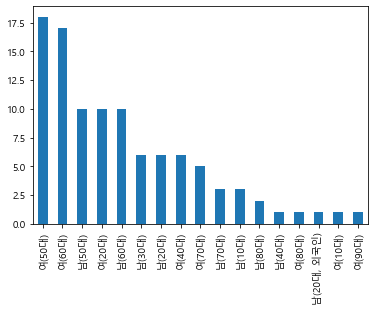

In [75]:
sex.head(55).plot(kind='bar')

50~60대 여성의 감염이 두드러지게 나타나고 있다. 

In [120]:
sex.tail(46)

여(50대)         18
여(60대)         17
남(50대)         11
여(20대)         10
남(60대)         10
남(20대)          7
남(30대)          6
여(40대)          6
여(70대)          5
남(70대)          3
남(10대)          3
남(80대)          2
남(40대)          1
여(80대)          1
남(20대, 외국인)     1
여(10대)          1
여(90대)          1
Name: 성별(연령대), dtype: int64

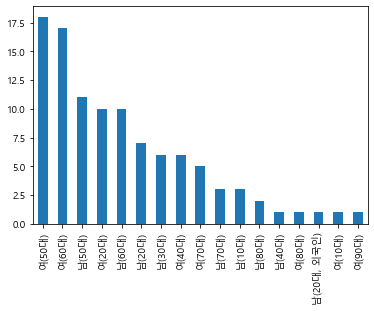

In [124]:
sex.tail(46).plot(kind='bar')

이러한 추세는 6월 15일 이전 확진 추세와 비교해봐도 동일하다.

In [125]:
#정확하지 않음. 수정해야 함.

# 정리   
-현재 대전 지역의 감염은 확산되는 추세이다.   
-타 지역에서 발생했던 슈퍼 전파자(개인)이 없는 대신, 다중 이용시설에 의한 전염이 주 경로이다.   
-주된 발생 지역은 서구와 유성구이나, 거주지가 중구인 인원들의 감염이 급증하고 있다.  
-또한 50~60대 여성이 확진자의 대다수를 차지하고 있다.   

-이를 통하여 볼 때, 다중 이용시설을 이용하는 은퇴 장년 여성 인구가 현재로선 제일 취약하다고 볼 수 있다. 따라서 다중 이용시설에 대한 집중 방역과 한시적인 폐쇄 조치가 확진 기세를 누그러뜨리는데 도움이 될 수 있을 것으로 보인다.

In [126]:
#인접 지역구로 전염이 확산되는 걸 언급했는데, 지도 활용해서 추세를 보여주는 것이 더 좋았을 것. 말로 설명하는 것 보다. 그리고 동구로의
#전염 증가 예상도 함께.

In [123]:
#사망/입원/완치 비교 추가, 월/일로 나눠서 항목 생성하는 것도 추가 고려.접촉력을 깜깜이/접촉으로 양분했는데 그거도 참고 고려.
#무조건 없다고 결측치 처리하기는 무리.
#이런 걸 만들 때는 최신화가 될 수 있도록 해야함. 즉 언제든지 갱신이 가능한 버전이어야 한다는 것. 따로 손볼 필요 없이.
#신문기사 자료 일부 넣는 것도 고려해볼만 함. 분석이라던가.
#미채번 확진자 변화 추이
#접촉력 공백을 확인 불가 따위로 명칭 바꾸는 거 고려.
#날짜를 날짜 형식으로 균등하게 변경하는 거.
#우현민-table select 해온 거 특이함. 살펴볼 것.
#데이터는 변경이 쉬우냐가(html 내용 변화에 따라) 중요함.
#완치자 세대, 성별 비교.
#성별/연령 비교는 srt, split 함수 조합으로 함.
#접촉력 기준 장소별 남녀 확진자 수 차이/연령대별 차이
#html 태그 선택 시에 자세하게 기술.